# September

## 31th (August)

### (M) 417. Pacific Atlantic Water Flow ★★

Time limit exceeded ... the whole code must be more shortened

In [29]:
from typing import List
heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]

class Solution:
    def pacificAtlantic(self, heights: List[List[int]]) -> List[List[int]]:

        def dfs_loop(grid):
            self.m, self.n = len(grid), len(grid[0])
            self.res = []
            visited_map = [['X' for i in range(self.n)] for j in range(self.m)]
            self.Pac, self.Atl = False, False

            for i in range(len(grid)):
                for j in range(len(grid[0])):


                    dfs(i, j, visited_map, grid)
                    if self.Pac == True == self.Atl:
                        self.res.append( (i, j) )

                    self.Pac, self.Atl = False, False
                    
            return self.res


        def dfs(i, j, visited_map, grid):
            if (i, j) in self.res:
                self.Pac, self.Atl = True, True
                return

            if (visited_map[i][j] == 'O'):
                return
            
            ## Pacific condition ##
            if (i == 0) or (j == 0):
                self.Pac = True
                ## Reach both at once ##
                if ((i == 0) and (j == self.n - 1)) or ((i == self.m - 1) and (j == 0)):
                    self.Atl = True
                
                for next_i, next_j in [(i-1, j), (i+1, j), (i, j+1), (i, j-1)]:
                    if (next_i<0) or (next_j<0) or (next_i>=self.m) or (next_j>=self.n):
                        pass
                    else:
                        if grid[i][j] >= grid[next_i][next_j]:
                            visited_map[i][j] = 'O'
                            dfs(next_i, next_j, visited_map, grid)
                            visited_map[i][j] = 'X'

                return

            ## Atlantic condition ##
            if (i == self.m - 1) or (j == self.n - 1):
                self.Atl = True
                ## Reach both at once ##
                if ((i == 0) and (j == self.n - 1)) or ((i == self.m - 1) and (j == 0)):
                    self.Pac = True
                    
                for next_i, next_j in [(i-1, j), (i+1, j), (i, j+1), (i, j-1)]:
                    if (next_i<0) or (next_j<0) or (next_i>=self.m) or (next_j>=self.n):
                        pass
                    else:
                        if grid[i][j] >= grid[next_i][next_j]:
                            visited_map[i][j] = 'O'
                            dfs(next_i, next_j, visited_map, grid)
                            visited_map[i][j] = 'X'
                    
                return


            for next_i, next_j in [(i-1, j), (i+1, j), (i, j+1), (i, j-1)]:
                
                if grid[i][j] >= grid[next_i][next_j]:
                    visited_map[i][j] = 'O'
                    dfs(next_i, next_j, visited_map, grid)
                    visited_map[i][j] = 'X'
                    

                
        return dfs_loop(heights)
Solution().pacificAtlantic(heights)

[(0, 4), (1, 3), (1, 4), (2, 2), (3, 0), (3, 1), (4, 0)]

58 / 5

In [33]:
from typing import List
heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]

class Solution:
    def pacificAtlantic(self, matrix: List[List[int]]) -> List[List[int]]:

        if not matrix:
            return []

        rows, cols = len(matrix), len(matrix[0])
        p_visited = set()
        a_visited = set()
        directions = ((0, 1), (0, -1), (1, 0), (-1, 0))

        def dfs(i, j, visited):
            
            if (i, j) in visited:
                return
            
            visited.add((i, j))

            for direction in directions:
                next_i, next_j = i + direction[0], j + direction[1]
                
                if (0 <= next_i < rows) and (0 <= next_j < cols):
                    
                    if matrix[next_i][next_j] >= matrix[i][j]:
                        dfs(next_i, next_j, visited)

        for row in range(rows):
            dfs(row, 0, p_visited)
            dfs(row, cols - 1, a_visited)

        for col in range(cols):
            dfs(0, col, p_visited)
            dfs(rows - 1, col, a_visited)
            
        print(p_visited)
        print(a_visited)

        return list(p_visited & a_visited)
Solution().pacificAtlantic(heights)

{(0, 1), (1, 2), (0, 0), (1, 3), (3, 0), (2, 2), (1, 0), (3, 1), (1, 4), (2, 1), (2, 0), (1, 1), (0, 4), (0, 3), (0, 2), (4, 0)}
{(4, 1), (1, 3), (3, 2), (3, 3), (3, 0), (2, 2), (4, 4), (3, 1), (1, 4), (2, 3), (4, 3), (0, 4), (4, 2), (3, 4), (2, 4), (4, 0)}


[(1, 3), (3, 0), (3, 1), (1, 4), (0, 4), (2, 2), (4, 0)]

## 1st

### (M) 48. Rotate Image ★★

Standard method but took quite much time for me to come up with this solution since I still lack the appreciation of pointers - tried to swap a row with another row-like list (actually was a column) at once like a fool.

In [12]:
from typing import List

matrix = [[5,1,9,11],[2,4,8,10],[13,3,6,7],[15,14,12,16]]

class Solution:
    def rotate(self, matrix: List[List[int]]) -> None:
        """
        Do not return anything, modify matrix in-place instead.
        """
        # reverse
        l = 0
        r = len(matrix) -1
        while l < r:
            matrix[l], matrix[r] = matrix[r], matrix[l]
            l += 1
            r -= 1
            
        # transpose 
        for i in range(len(matrix)):
            for j in range(i):
                matrix[i][j], matrix[j][i] = matrix[j][i], matrix[i][j]
                
        return matrix
        
Solution().rotate(matrix)

[[15, 13, 2, 5], [14, 3, 4, 1], [12, 6, 8, 9], [16, 7, 10, 11]]

<a href="https://leetcode.com/problems/rotate-image/discuss/18884/Seven-Short-Solutions-(1-to-7-lines)">One of the best seven short solutions from LeetCode discussion</a>

In [ ]:
class Solution:
    def rotate(self, A):
        A.reverse() # reverse the matrix upside-down in one line
        for i in range(len(A)):
            for j in range(i):
                A[i][j], A[j][i] = A[j][i], A[i][j]

### (E) 94. Binary Tree Inorder Traversal

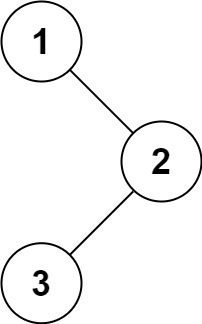

In [34]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        
root = TreeNode(1)
root.right = TreeNode(2)
root.right.left = TreeNode(3)

Recursive solution - 72 / 60

In [ ]:
class Solution:
    def inorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        result = []
        
        def dfs(node):
            if node is not None:
                
                dfs(node.left)
                result.append(node.val)
                dfs(node.right)
            
        dfs(root)
        return result

Iterative solution - 97 / 60

In [ ]:
class Solution:
    def inorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        result = []
        stack = []
        cur = root
        
        while cur or stack:
            while cur:
                stack.append(cur)
                cur = cur.left
            cur = stack.pop()
            result.append(cur.val)
            cur = cur.right
            
        return result